In [1]:
from binance.client import Client
import pandas as pd
import numpy as np
from datetime import datetime
import userbinance
import talib
import matplotlib.pyplot as plt

In [2]:
interval = Client.KLINE_INTERVAL_4HOUR

In [3]:
client = Client(userbinance.API_KEY, userbinance.API_SECRET, tld='com')

In [4]:
symbolticker = 'BTCUSDT'

# Futuros

In [146]:
fecha = datetime(2020, 1, 1)
start_date = fecha.timestamp() * 1000

fecha = datetime(2023, 10, 20)
end_date = fecha.timestamp() * 1000

In [172]:
klines = []

# Realiza solicitudes sucesivas para obtener todos los datos
while start_date < end_date:
    current_klines = client.futures_klines(symbol=symbolticker, interval=interval, startTime=start_date)
    klines.extend(current_klines)
    
    # Actualiza la marca de tiempo de inicio para la próxima solicitud
    start_date = current_klines[-1][6] + 1
df = pd.DataFrame(klines)

In [167]:
klines = client.futures_klines(symbol=symbolticker, interval=interval, startTime=1603346400000, endTime=1697950800000,)
df = pd.DataFrame(klines)

BinanceAPIException: APIError(code=-1130): Data sent for parameter 'limit' is not valid.

# SPOT

In [12]:
klines = client.get_historical_klines(symbolticker, interval, "4 year ago UTC")
df = pd.DataFrame(klines)

***

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1571745600000,8276.17000000,8297.99000000,8165.00000000,8210.31000000,6546.80822500,1571759999999,53842542.18423900,69577,3172.08698900,26087574.89285403,0
1,1571760000000,8210.76000000,8223.24000000,8156.00000000,8167.91000000,3587.85509100,1571774399999,29393519.77312029,54965,1782.70603700,14606740.45132647,0
2,1571774400000,8167.91000000,8168.72000000,8000.00000000,8020.00000000,8465.43658200,1571788799999,68363398.79696323,82369,3681.98547400,29732861.66811680,0
3,1571788800000,8020.06000000,8047.59000000,7930.00000000,7954.34000000,5513.12911600,1571803199999,44121069.77611914,70568,2503.59549200,20043483.04650558,0
4,1571803200000,7953.58000000,7984.20000000,7920.00000000,7957.19000000,5863.10599700,1571817599999,46660940.44725075,66942,2635.78324500,20982237.93673160,0


In [14]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
8760,1697904000000,29937.37000000,30379.99000000,29846.00000000,30145.04000000,8767.01436000,1697918399999,263675909.98540840,342331,4686.92067000,140962911.04130220,0
8761,1697918400000,30145.03000000,30158.20000000,29850.00000000,29909.80000000,3127.25769000,1697932799999,93786881.37416930,163641,1442.83739000,43270385.99060000,0
8762,1697932800000,29909.80000000,30075.00000000,29843.20000000,29907.38000000,3204.67567000,1697947199999,95893089.58149170,144677,1591.23675000,47613883.27252190,0
8763,1697947200000,29907.38000000,30248.00000000,29640.00000000,29816.26000000,7070.12608000,1697961599999,211961009.21713420,255898,3405.18069000,102086304.27116040,0
8764,1697961600000,29816.27000000,29991.05000000,29780.11000000,29929.34000000,2228.66312000,1697975999999,66589729.20858240,111393,1090.88960000,32592392.01871330,0


In [15]:
len(df)

8765

In [23]:
df_temp = df

In [24]:
df_temp = df_temp[[0,1,2,3,4,5]]
df_temp.head()

,0,1,2,3,4,5
0,1571745600000,8276.17000000,8297.99000000,8165.00000000,8210.31000000,6546.80822500
1,1571760000000,8210.76000000,8223.24000000,8156.00000000,8167.91000000,3587.85509100
2,1571774400000,8167.91000000,8168.72000000,8000.00000000,8020.00000000,8465.43658200
3,1571788800000,8020.06000000,8047.59000000,7930.00000000,7954.34000000,5513.12911600
4,1571803200000,7953.58000000,7984.20000000,7920.00000000,7957.19000000,5863.10599700


In [183]:
df_temp.rename(columns={0: 'Date',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'}, inplace=True)

C:\Users\Guille\AppData\Local\Temp\ipykernel_23944\354983717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={0: 'Date',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'}, inplace=True)


In [184]:
df_temp.head()

,Date,Open,High,Low,Close,Volume
0,1571731200000,8208.60000000,8278.97000000,8208.51000000,8276.16000000,8117.33338400
1,1571745600000,8276.17000000,8297.99000000,8165.00000000,8210.31000000,6546.80822500
2,1571760000000,8210.76000000,8223.24000000,8156.00000000,8167.91000000,3587.85509100
3,1571774400000,8167.91000000,8168.72000000,8000.00000000,8020.00000000,8465.43658200
4,1571788800000,8020.06000000,8047.59000000,7930.00000000,7954.34000000,5513.12911600


In [185]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    8765 non-null   int64 
 1   Open    8765 non-null   object
 2   High    8765 non-null   object
 3   Low     8765 non-null   object
 4   Close   8765 non-null   object
 5   Volume  8765 non-null   object
dtypes: int64(1), object(5)
memory usage: 411.0+ KB


In [186]:
df_temp['Date'] = df_temp['Date'].apply(lambda x: datetime.fromtimestamp(x/1000))
df_temp.head()

C:\Users\Guille\AppData\Local\Temp\ipykernel_23944\2086835934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Date'] = df_temp['Date'].apply(lambda x: datetime.fromtimestamp(x/1000))


,Date,Open,High,Low,Close,Volume
0,2019-10-22 05:00:00,8208.60000000,8278.97000000,8208.51000000,8276.16000000,8117.33338400
1,2019-10-22 09:00:00,8276.17000000,8297.99000000,8165.00000000,8210.31000000,6546.80822500
2,2019-10-22 13:00:00,8210.76000000,8223.24000000,8156.00000000,8167.91000000,3587.85509100
3,2019-10-22 17:00:00,8167.91000000,8168.72000000,8000.00000000,8020.00000000,8465.43658200
4,2019-10-22 21:00:00,8020.06000000,8047.59000000,7930.00000000,7954.34000000,5513.12911600


In [187]:
columnas_a_convertir = ['Open','High','Low','Close','Volume']
df_temp[columnas_a_convertir] = df_temp[columnas_a_convertir].astype(float).round(4)
df_temp.head()

C:\Users\Guille\AppData\Local\Temp\ipykernel_23944\515939337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[columnas_a_convertir] = df_temp[columnas_a_convertir].astype(float).round(4)


,Date,Open,High,Low,Close,Volume
0,2019-10-22 05:00:00,8208.60,8278.97,8208.51,8276.16,8117.3334
1,2019-10-22 09:00:00,8276.17,8297.99,8165.00,8210.31,6546.8082
2,2019-10-22 13:00:00,8210.76,8223.24,8156.00,8167.91,3587.8551
3,2019-10-22 17:00:00,8167.91,8168.72,8000.00,8020.00,8465.4366
4,2019-10-22 21:00:00,8020.06,8047.59,7930.00,7954.34,5513.1291


In [188]:
df_temp['RSI'] = talib.RSI(df_temp['Close'].values, timeperiod=14).round(2)
df_temp['EMA20'] = talib.EMA(df_temp['Close'].values, timeperiod=20).round(2)
df_temp['EMA40'] = talib.EMA(df_temp['Close'].values, timeperiod=40).round(2)
df_temp['EMA60'] = talib.EMA(df_temp['Close'].values, timeperiod=60).round(2)

df_temp['fastk'], df_temp['fastd'] = talib.STOCHRSI(df_temp['Close'].values, timeperiod=14)
df_temp['fastk'] = df_temp['fastk'].round(2)
df_temp['fastd'] = df_temp['fastd'].round(2)

df_temp['macd_line'], df_temp['signal_line'], _ = talib.MACD(df_temp['Close'])
df_temp['macd_line'] = df_temp['macd_line'].round(2)
df_temp['signal_line'] = df_temp['signal_line'].round(2)

df_temp['upper'], df_temp['middle'],df_temp['lower'] = talib.BBANDS(df_temp['Close'], timeperiod=5)
df_temp['upper'] = df_temp['upper'].round(2)
df_temp['middle'] = df_temp['middle'].round(2)
df_temp['lower'] = df_temp['lower'].round(2)

adx_values = talib.ADX(df_temp['High'], df_temp['Low'], df_temp['Close'], timeperiod=14).round(2)

C:\Users\Guille\AppData\Local\Temp\ipykernel_23944\213255832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['RSI'] = talib.RSI(df_temp['Close'].values, timeperiod=14).round(2)
C:\Users\Guille\AppData\Local\Temp\ipykernel_23944\213255832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['EMA20'] = talib.EMA(df_temp['Close'].values, timeperiod=20).round(2)
C:\Users\Guille\AppData\Local\Temp\ipykernel_23944\213255832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [189]:
df_temp.head()

,Date,Open,High,Low,Close,Volume,RSI,EMA20,EMA40,EMA60,fastk,fastd,macd_line,signal_line,upper,middle,lower
0,2019-10-22 05:00:00,8208.60,8278.97,8208.51,8276.16,8117.3334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-22 09:00:00,8276.17,8297.99,8165.00,8210.31,6546.8082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-22 13:00:00,8210.76,8223.24,8156.00,8167.91,3587.8551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-10-22 17:00:00,8167.91,8168.72,8000.00,8020.00,8465.4366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-22 21:00:00,8020.06,8047.59,7930.00,7954.34,5513.1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8365.94,8125.74,7885.55


In [190]:
df_temp = df_temp.iloc[59::]
df_temp.reset_index(drop=True, inplace=True)
df_temp.head()

,Date,Open,High,Low,Close,Volume,RSI,EMA20,EMA40,EMA60,fastk,fastd,macd_line,signal_line,upper,middle,lower
0,2019-11-01 01:00:00,9064.12,9137.00,9030.00,9099.00,4264.6483,47.83,9159.96,8932.27,8735.44,26.35,18.82,32.38,75.53,9265.45,9145.60,9025.75
1,2019-11-01 05:00:00,9099.43,9279.00,9088.88,9163.16,10698.3508,50.82,9160.26,8943.53,8749.47,74.15,33.50,30.94,66.61,9237.69,9135.44,9033.18
2,2019-11-01 09:00:00,9164.56,9248.51,9061.65,9082.43,10852.3561,47.16,9152.85,8950.31,8760.38,21.92,40.81,23.01,57.89,9183.77,9109.71,9035.66
3,2019-11-01 13:00:00,9082.43,9213.57,9060.00,9170.49,6294.9252,51.29,9154.53,8961.05,8773.83,100.00,65.36,23.57,51.03,9202.38,9115.64,9028.91
4,2019-11-01 17:00:00,9170.09,9277.16,9167.15,9231.61,6240.6922,53.97,9161.87,8974.25,8788.84,100.00,73.97,28.61,46.54,9256.74,9149.34,9041.94


In [127]:
df_temp.to_pickle(f'./Datasets/df_{symbolticker}_4hs.pickle')

***

In [26]:
# Cargar datos
df_temp = pd.read_pickle(f'./Datasets/df_{symbolticker}_1day.pickle')

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1036 non-null   datetime64[ns]
 1   Open         1036 non-null   float64       
 2   High         1036 non-null   float64       
 3   Low          1036 non-null   float64       
 4   Close        1036 non-null   float64       
 5   Volume       1036 non-null   float64       
 6   RSI          1036 non-null   float64       
 7   EMA20        1036 non-null   float64       
 8   EMA40        1036 non-null   float64       
 9   EMA60        1036 non-null   float64       
 10  fastk        1036 non-null   float64       
 11  fastd        1036 non-null   float64       
 12  macd_line    1036 non-null   float64       
 13  signal_line  1036 non-null   float64       
 14  upper        1036 non-null   float64       
 15  middle       1036 non-null   float64       
 16  lower 

In [28]:
df_temp[df_temp.columns[1::]]

,Open,High,Low,Close,Volume,RSI,EMA20,EMA40,EMA60,fastk,fastd,macd_line,signal_line,upper,middle,lower
0,23821.60,24295.00,23060.00,23455.52,76690.1457,75.226377,20328.146803,18663.041590,17177.006167,55.178184,85.059395,1449.402414,1023.745781,24614.367852,22903.440,21192.512148
1,23455.54,24102.77,21815.00,22719.71,88030.2972,68.406775,20555.914726,18860.927854,17358.734161,0.000000,51.726061,1459.634337,1110.923492,24005.519704,23180.278,22355.036296
2,22719.88,23837.10,22353.40,23810.79,87033.1262,72.402007,20865.902848,19102.384544,17570.276976,38.226042,31.134742,1538.054512,1196.349696,24229.907377,23383.004,22536.100623
3,23810.79,24100.00,22600.00,23232.76,119047.2597,67.529839,21091.317815,19303.866274,17755.932157,0.000000,12.742014,1535.856478,1264.251053,24227.845439,23408.078,22588.310561
4,23232.39,23794.43,22703.42,23729.20,69013.8343,69.432382,21342.544689,19519.736212,17951.777004,24.719454,20.981832,1556.233785,1322.647599,24174.669765,23389.596,22604.522235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,28500.77,28613.65,28069.32,28395.91,38428.4453,63.797611,27371.229087,27200.907754,27249.367062,91.731756,97.243919,242.968708,182.500130,29032.543576,27553.064,26073.584424
1032,28395.91,28982.36,28142.87,28320.00,32162.4759,62.628495,27461.588222,27255.497620,27284.469781,85.556049,92.429268,288.146079,203.629320,29236.509780,27844.664,26452.818220
1033,28320.00,28916.89,28100.66,28713.71,35895.5018,66.098531,27580.837915,27326.629931,27331.330116,100.000000,92.429268,351.664805,233.236417,29312.179750,28216.910,27121.640250
1034,28713.71,30207.55,28578.29,29669.04,59422.0992,72.718099,27779.714304,27440.893837,27407.976342,100.000000,95.185350,473.631274,281.315388,29705.304931,28719.888,27734.471069


In [29]:
# Calcular la matriz de correlaciones
correlation_matrix = df_temp.corr()

# Crear el gráfico de matriz de correlaciones (heatmap)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1600x1200 with 0 Axes>

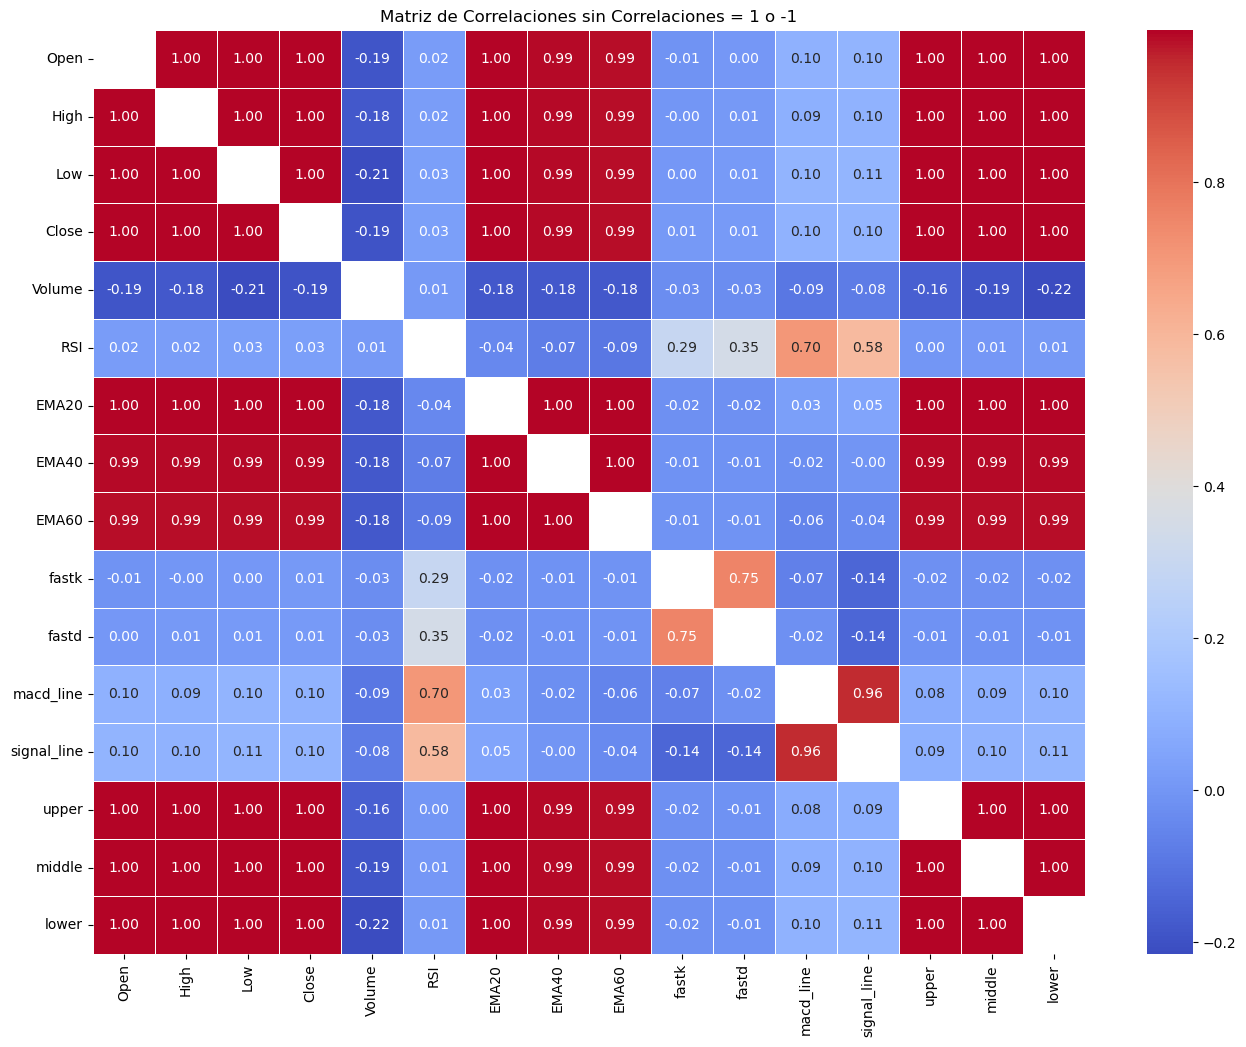

In [39]:
df_temp.drop('Date',axis=1,inplace=True)
correlation_matrix = df_temp.corr()

# Eliminar correlaciones iguales a 1 o -1
correlation_matrix = correlation_matrix.mask(np.isclose(correlation_matrix, 1) | np.isclose(correlation_matrix, -1))

# Crear el gráfico de matriz de correlaciones (heatmap)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaciones sin Correlaciones = 1 o -1')
plt.show()